In [35]:
# plot the results for linear PCMCI+

In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import tigramite
from tigramite import data_processing
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
import pickle
from IPython.display import clear_output
from tigramite import plotting as tp
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Analysis of PCMCIplus results

In [29]:
#Get the linear PCMCIplus results for personal exposure PM2.5
df_20h_plus = pd.read_csv("results/p_plus/linear_p_20h_plus.csv", header = 0, index_col="trial")
df_20h_plus

,1,2,3,4,5,6,7,8,9,10,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
trial,,,,,,,,,,,,,,,,,,,,,
DAP017(1).csv,0.246740,0.071138,0.279211,0.608196,0.914761,0.727817,0.526828,0.924476,0.418717,0.804213,...,0.792710,0.742047,0.825215,0.674814,0.690176,0.668991,0.558492,0.564813,0.786543,0.454331
DAP050(1).csv,0.107393,0.083516,0.080458,0.196894,0.166646,0.235375,0.444812,0.255384,0.556570,0.545993,...,0.507542,0.257111,0.065410,0.051152,0.513358,0.135872,0.066213,0.314855,0.114909,0.055508
DAP021(1).csv,0.846012,0.587257,0.969698,0.665530,0.479670,0.317836,0.134137,0.223547,0.916509,0.676133,...,0.636075,0.672178,0.965058,0.582544,0.628206,0.996826,0.936374,0.742864,0.354389,0.244004
DAP042(1).csv,0.092161,0.388950,0.878567,0.857145,0.599190,0.332299,0.161292,0.127854,0.115463,0.168255,...,0.497036,0.051244,0.100581,0.133359,0.500274,0.816592,0.871667,0.406265,0.394305,0.610899
DAP019(1).csv,0.083591,0.813186,0.366776,0.433415,0.791348,0.565297,0.251888,0.233134,0.532122,0.887688,...,0.259675,0.088297,0.218652,0.144486,0.109266,0.061102,0.121143,0.169490,0.424208,0.098026
DAP007(1).csv,0.131706,0.206749,0.175194,0.678977,0.866393,0.533664,0.783632,0.890638,0.910594,0.976075,...,0.350188,0.879782,0.993681,0.635903,0.134156,0.132205,0.062036,0.052197,0.093994,0.514660
DAP044(1).csv,0.358355,0.255482,0.363761,0.234752,0.269311,0.988954,0.458685,0.599552,0.780535,0.308290,...,0.479105,0.190820,0.969015,0.281001,0.162723,0.810677,0.358178,0.462179,0.893524,0.818689
DAP014(2).csv,0.347684,0.234512,0.535498,0.051581,0.057679,0.107261,0.066365,0.080021,0.258300,0.175953,...,0.591621,0.405470,0.315442,0.356760,0.470555,0.387649,0.555892,0.841688,0.801186,0.479046
DAP025(1).csv,0.648813,0.744741,0.699195,0.695374,0.591393,0.445869,0.350691,0.392076,0.441466,0.512053,...,0.580637,0.863347,0.125694,0.390938,0.554199,0.817493,0.961271,0.093999,0.175861,0.183135


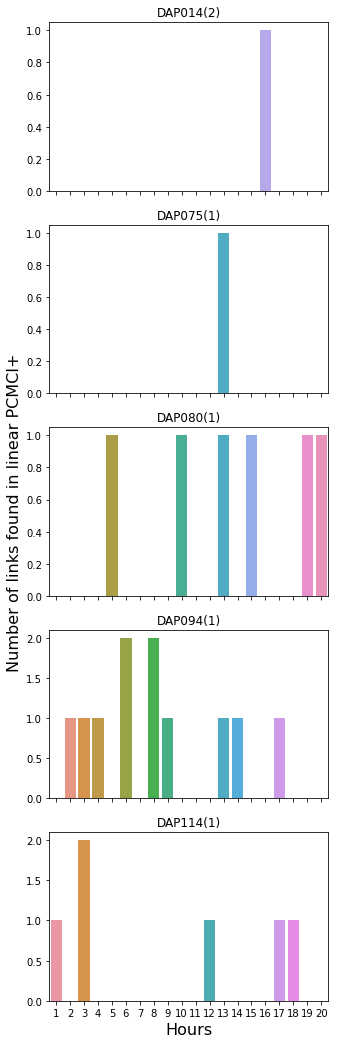

In [24]:
targets = ['DAP014(2).csv', 'DAP075(1).csv','DAP080(1).csv', 'DAP094(1).csv', 'DAP114(1).csv']
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(5, 18))

x = [j for j in range(1,21)]

for i in range(5):

    links_h_plus = []
    for j in range(20):
        links_h_plus.append(len(np.argwhere(df_20h_plus.loc[targets[i]][(60*j):60*(j+1)].values <= 0.05)))

    sns.barplot(x = x, y = np.array(links_h_plus), ax = axs[i])
    axs[i].set_ylabel("")
    axs[i].set_title("{}".format(targets[i][:9]))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links found in linear PCMCI+", fontsize = 16)
plt.savefig("results/plot_plus/example_5_trials.pdf")

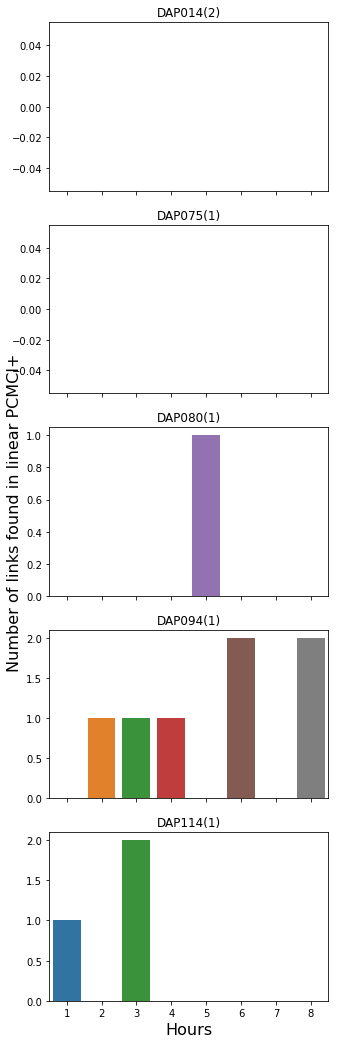

In [27]:
targets = ['DAP014(2).csv', 'DAP075(1).csv','DAP080(1).csv', 'DAP094(1).csv', 'DAP114(1).csv']
fig, axs = plt.subplots(5, 1, sharex=True, figsize=(5, 18))

x = [j for j in range(1, 9)]

for i in range(5):

    links_h_plus = []
    for j in range(8):
        links_h_plus.append(len(np.argwhere(df_20h_plus.loc[targets[i]][(60*j):60*(j+1)].values <= 0.05)))

    sns.barplot(x = x, y = np.array(links_h_plus), ax = axs[i])
    axs[i].set_ylabel("")
    axs[i].set_title("{}".format(targets[i][:9]))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links found in linear PCMCI+", fontsize = 16)
plt.savefig("results/plot_plus/example_5_trials2.pdf")

In [31]:
#Get the number of links per time lag (plus)
linksplus = []
for i in range(1, 1201):
    linksplus.append(len(np.argwhere(df_20h_plus[str(i)].values <= 0.05)))
#Total number of causal links
np.sum(np.array(linksplus))

176

In [32]:
#Average number of links per trial (plus)
avg_links_plus = np.sum(np.array(linksplus))/len(df_20h_plus)
avg_links_plus

6.518518518518518

In [33]:
#Proportion of links per lags (plus)
avg_links_plus / 1200

0.005432098765432099

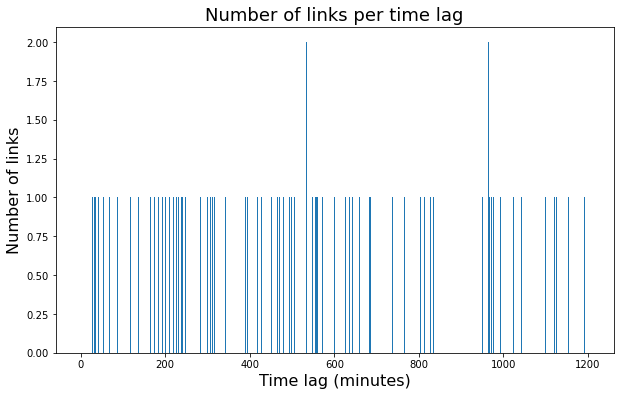

In [34]:
plt.subplots(figsize = (10,6))
plt.bar(range(1,1201), linksplus, width=1)
plt.title("Number of links per time lag", fontsize = 18)
plt.xlabel("Time lag (minutes)", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig("results/plot_plus/num_linksplus_time_lag.pdf")

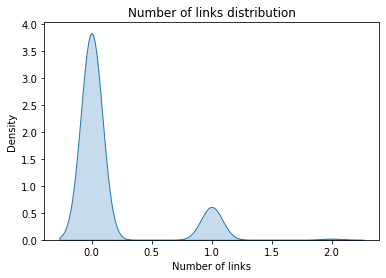

In [37]:
#Get the distribution of the number of links
ax = sns.kdeplot(linksplus, shade=True)
ax.set_title("Number of links distribution")
ax.set_ylabel("Density")
ax.set_xlabel("Number of links")
plt.savefig("results/plot_plus/num_linksplus_distribution.pdf")

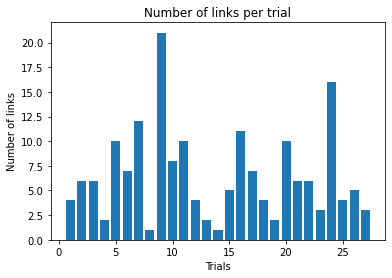

In [38]:
#Get the number of links per trial
linksplus = []
for i in range(len(df_20h_plus)):
    linksplus.append(len(np.argwhere(df_20h_plus.iloc[i,:].values <= 0.05)))
    
plt.bar(range(1,len(df_20h_plus)+1), linksplus)
plt.title("Number of links per trial")
plt.xlabel("Trials")
plt.ylabel("Number of links")
plt.savefig("results/plot_plus/num_linksplus_trial.pdf")

In [40]:
min(linksplus)

1

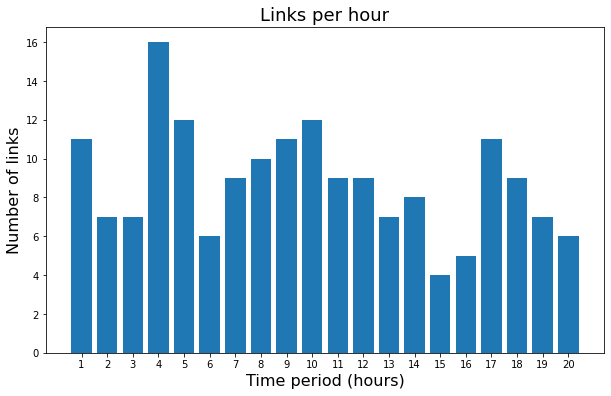

In [41]:
#Get the number of links found per hour
links_per_hour_plus = []
for j in range(20):
    links_h_plus = []
    for i in range(len(df_20h_plus)):
        links_h_plus.append(len(np.argwhere(df_20h_plus.iloc[i,(60*j):60*(j+1)].values <= 0.05)))
    links_per_hour_plus.append(np.sum(np.array(links_h_plus)))

plt.subplots(figsize = (10,6))
plt.bar(range(1,21), links_per_hour_plus)
plt.title("Links per hour", fontsize = 18)
plt.ylabel("Number of links", fontsize = 16)
plt.xlabel("Time period (hours)", fontsize = 16)
plt.xticks(range(1,21))
plt.savefig("results/plot_plus/num_linksplus_hour.pdf")

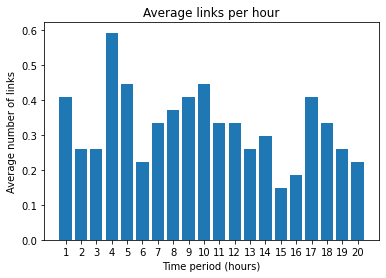

In [42]:
avg_links_per_hour_plus = np.array(links_per_hour_plus)/len(df_20h_plus)
plt.bar(range(1,21), avg_links_per_hour_plus)
plt.title("Average links per hour")
plt.ylabel("Average number of links")
plt.xlabel("Time period (hours)")
plt.xticks(range(1,21))
plt.savefig("results/plot_plus/avg_num_linksplus_hour.pdf")

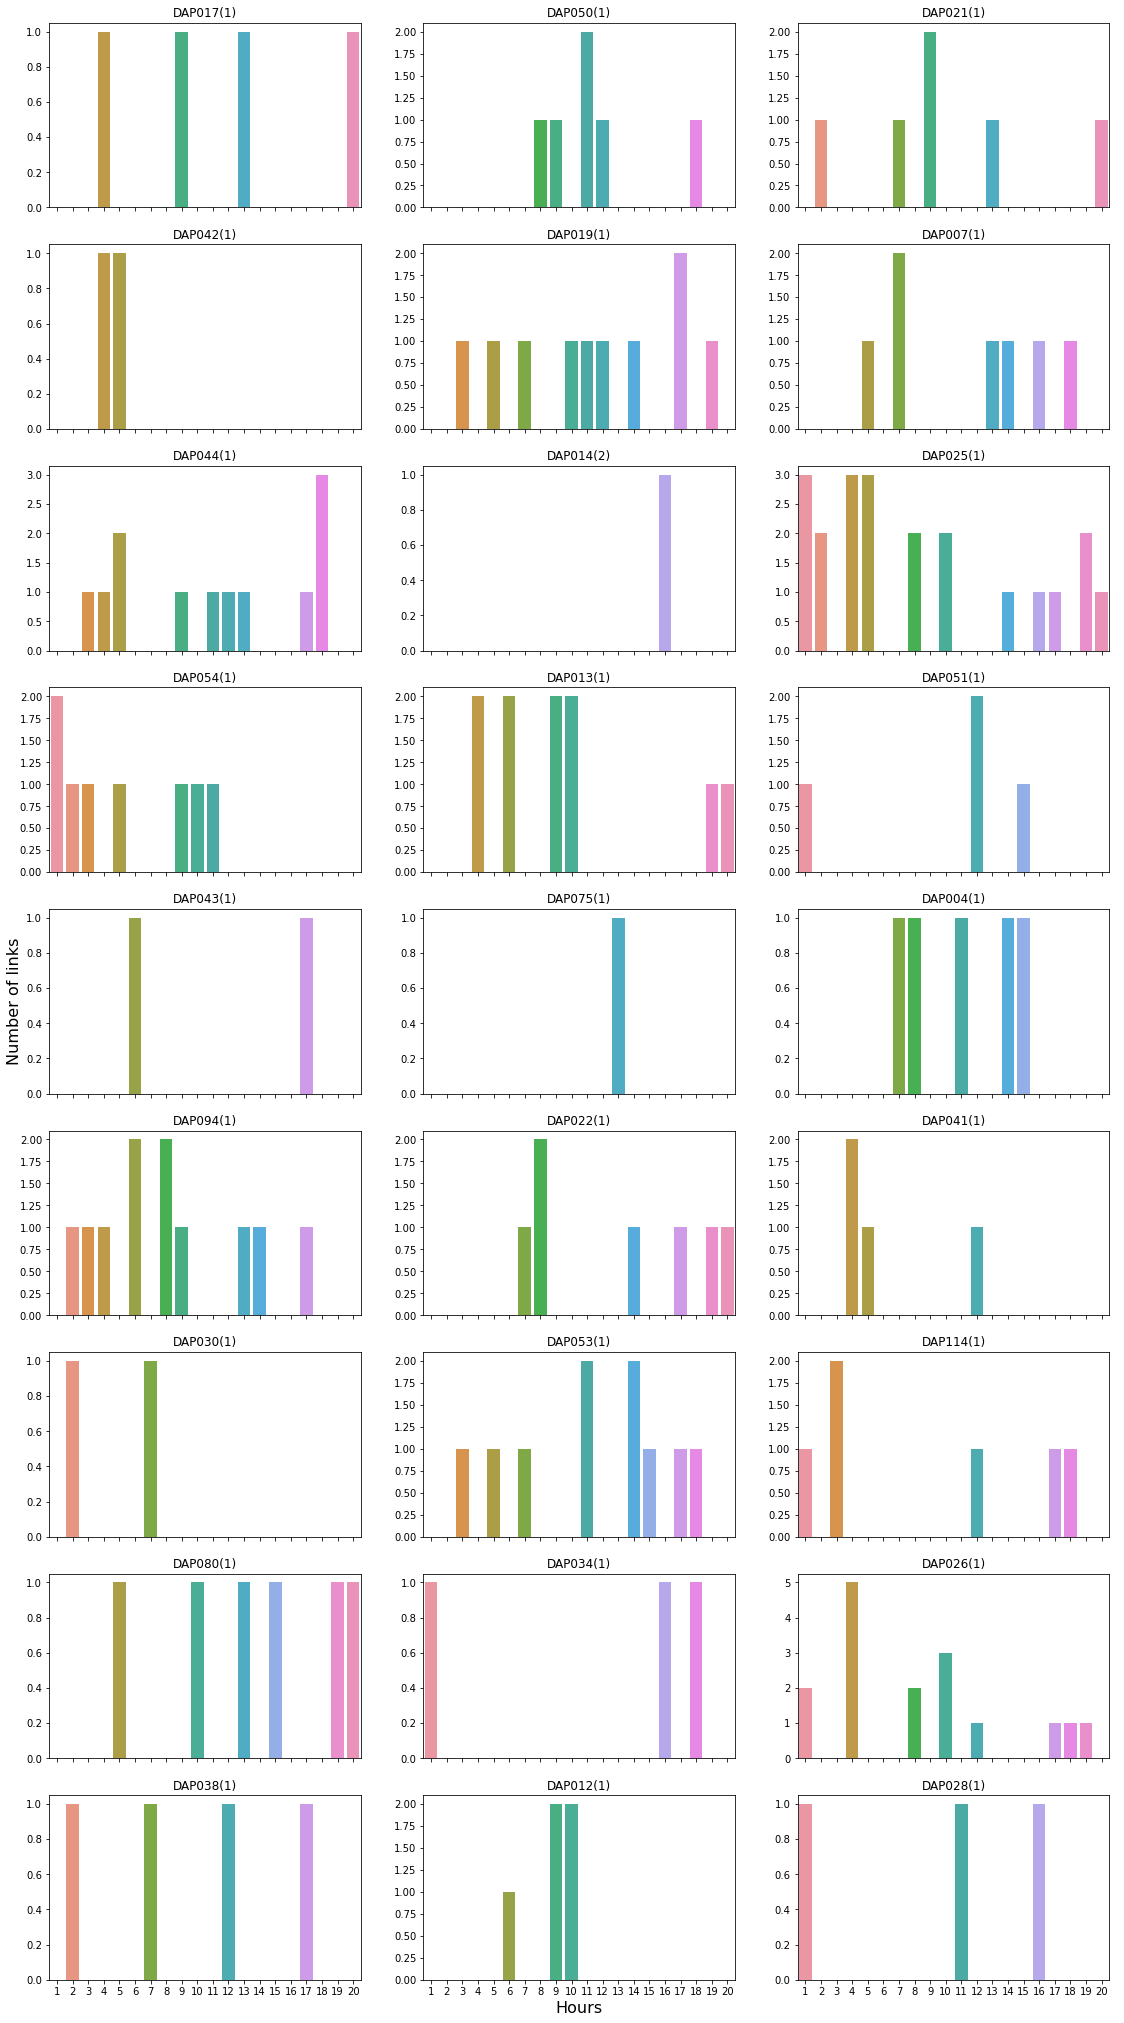

In [44]:
#Plot the distribution of links for each trial
fig, axs = plt.subplots(9, 3, sharex=True, figsize=(19,36))

x = [j for j in range(1,21)]

for i in range(len(df_20h_plus)):

    links_h_plus = []
    for j in range(20):
        links_h_plus.append(len(np.argwhere(df_20h_plus.iloc[i,(60*j):60*(j+1)].values <= 0.05)))

    sns.barplot(x = x, y = np.array(links_h_plus), ax = axs[int(i/3),i%3])
    axs[int(i/3),i%3].set_ylabel("")
    axs[int(i/3),i%3].set_title("{}".format(df_20h_plus.index[i][:9]))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Hours", fontsize = 16)
plt.ylabel("Number of links", fontsize = 16)
plt.savefig("results/plot_plus/linksplus_distribution_linear_per_trial.pdf")